In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# So that was just one instance of Draco

and in real life, we only get "one instance" of Draco. And with one fit only, we have just one measurement of the 1 sigma interval of the velocity dispersion.

In order to characterize the uncertainty of this 1 sigma interval, we may generate many instances of a Draco observation, fit the velocity dispersions (this time, I used the MCMC fitting function defined in the dsphsim package, and it returned a marginalized vdispersion fit). Doing this, we can present an ensemble of vdisp 1sigma intervals for each # of frames and characterize a spread of the intervals.

[0.760482 0.787    0.816518]
0.026518000000000375 0.029518000000000932


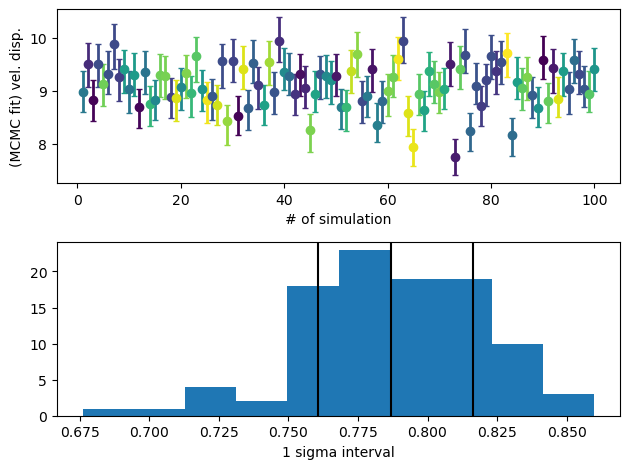

In [45]:
no=3
sigfile=np.loadtxt(f"dracotest/dracotest_1.0_IMACS_{no}.txt").T

# median sig # low sig # upper sigma # nstars # observing time
#    0       #.  1.    #.   2.       #. 3.    #.   4

med_sig=sigfile[0]
upp_sig=sigfile[0]-sigfile[1]
low_sig=sigfile[2]-sigfile[0]


f,ax=plt.subplots(2)

a=ax[0]
ine=range(len(sigfile[0]))
colors=plt.get_cmap('viridis')
ran=colors(np.random.rand(len(sigfile[0])))
for c in ine:
    a.errorbar([c+1],[med_sig[c]],yerr=[ [low_sig[c]] ,[upp_sig[c]] ],marker='o',linewidth=0,elinewidth=2,color=ran[c],capsize=2)
a.set_xlabel('# of simulation')
a.set_ylabel('(MCMC fit) vel. disp.')

a2=ax[1]

int_sig=upp_sig+low_sig

a2.hist(int_sig)
a2.set_xlabel('1 sigma interval')
linez=np.percentile(int_sig,[15.9,50,84.1])
for l in linez:
    a2.axvline(l,color='black')
print(linez)
print(linez[1]-linez[0],linez[2]-linez[1])
plt.tight_layout()
plt.show()

So for this ensemble where we used 300 stars observed each for 4 hours, we have a 1sigma vdisp interval of 0.787 km/s with a lower bound error of 0.0265 and an upper bound error of 0.0295.

In [ ]:
median=[]
lowers=[]
uppers=[]
nframes=[1,2,3,4,5,6,7,8,9,10]

for no in nframes:
    sigfile=np.loadtxt(f"dracotest/dracotest_1.0_IMACS_{no}.txt").T

    med_sig=sigfile[0]
    upp_sig=sigfile[0]-sigfile[1]
    low_sig=sigfile[2]-sigfile[0]


    int_sig=upp_sig+low_sig

    linez=np.percentile(int_sig,[15.9,50,84.1])
    median.append(linez[1])
    lowers.append(linez[1]-linez[0])
    uppers.append(linez[2]-linez[1])

f,a=plt.subplots(1,figsize=(16,4))
tottime=12*3600
for i in range(len(nframes)):
    
    a.axhline(0,linestyle='dotted',color='black')
    a.set_xticks(nframes)

a.fill_between(nframes,[-i for i in sg_lwe],sg_upe,alpha=0.5)
a.set_ylabel("1 sigma vel disp error (km/s)")
a.set_xticklabels([f"{no*100}stars\n{tottime/nframes[j]:.0f}s" for j in range(len(nframes))])
plt.show()